In [8]:
import pandas as pd
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
df = pd.read_csv("/Users/dhruvsood/Desktop/EDA/UpdatedResumeDataSet 5.csv")

In [9]:
df.head()

,Category,Resume
0,Data Science,Skills * Programming Languages: Python (pandas...
1,Data Science,Education Details \r\nMay 2013 to May 2017 B.E...
2,Data Science,"Areas of Interest Deep Learning, Control Syste..."
3,Data Science,Skills â¢ R â¢ Python â¢ SAP HANA â¢ Table...
4,Data Science,"Education Details \r\n MCA YMCAUST, Faridab..."


In [10]:
df.tail()

,Category,Resume
957,Testing,Computer Skills: â¢ Proficient in MS office (...
958,Testing,â Willingness to accept the challenges. â ...
959,Testing,"PERSONAL SKILLS â¢ Quick learner, â¢ Eagerne..."
960,Testing,COMPUTER SKILLS & SOFTWARE KNOWLEDGE MS-Power ...
961,Testing,Skill Set OS Windows XP/7/8/8.1/10 Database MY...


In [11]:
df.shape

(962, 2)

In [12]:
df['Category'].value_counts()

Category
Java Developer               84
Testing                      70
DevOps Engineer              55
Python Developer             48
Web Designing                45
HR                           44
Hadoop                       42
Blockchain                   40
ETL Developer                40
Operations Manager           40
Data Science                 40
Sales                        40
Mechanical Engineer          40
Arts                         36
Database                     33
Electrical Engineering       30
Health and fitness           30
PMO                          30
Business Analyst             28
DotNet Developer             28
Automation Testing           26
Network Security Engineer    25
SAP Developer                24
Civil Engineer               24
Advocate                     20
Name: count, dtype: int64

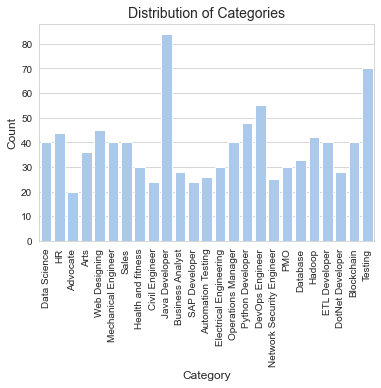

None


In [26]:
def plotDistrCat():
    sns.set_style("whitegrid")
    sns.set_palette("pastel")
    sns.countplot(data=df, x='Category')
    plt.xlabel('Category', fontsize=12)
    plt.ylabel('Count', fontsize=12)
    plt.title('Distribution of Categories', fontsize=14)
    plt.xticks(rotation=90)

    # Show the plot
    plt.show()
    return
x=plotDistrCat()
print(x)

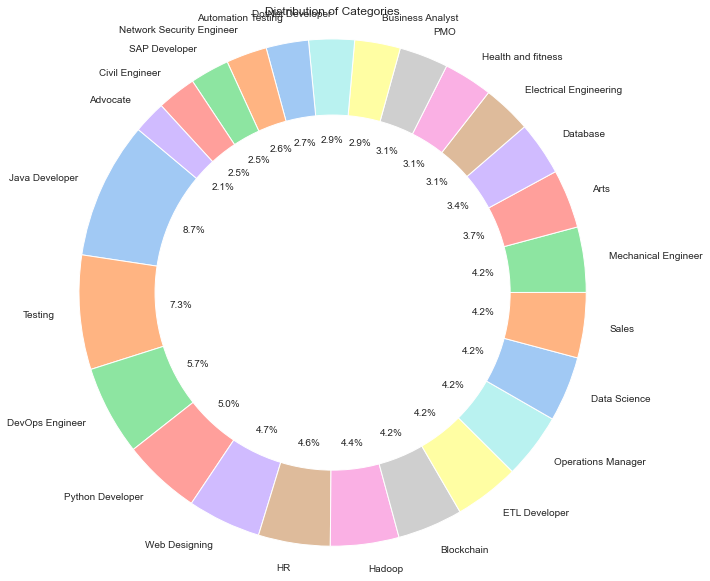

In [24]:

category_counts = df['Category'].value_counts()
plt.figure(figsize=(10, 10))
plt.pie(category_counts, labels=category_counts.index, autopct='%1.1f%%', startangle=140)
centre_circle = plt.Circle((0,0),0.70,fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)
plt.axis('equal')


plt.title('Distribution of Categories')
plt.show()

In [27]:
df['Resume'][0]

'Skills * Programming Languages: Python (pandas, numpy, scipy, scikit-learn, matplotlib), Sql, Java, JavaScript/JQuery. * Machine learning: Regression, SVM, NaÃ¯ve Bayes, KNN, Random Forest, Decision Trees, Boosting techniques, Cluster Analysis, Word Embedding, Sentiment Analysis, Natural Language processing, Dimensionality reduction, Topic Modelling (LDA, NMF), PCA & Neural Nets. * Database Visualizations: Mysql, SqlServer, Cassandra, Hbase, ElasticSearch D3.js, DC.js, Plotly, kibana, matplotlib, ggplot, Tableau. * Others: Regular Expression, HTML, CSS, Angular 6, Logstash, Kafka, Python Flask, Git, Docker, computer vision - Open CV and understanding of Deep learning.Education Details \r\n\r\nData Science Assurance Associate \r\n\r\nData Science Assurance Associate - Ernst & Young LLP\r\nSkill Details \r\nJAVASCRIPT- Exprience - 24 months\r\njQuery- Exprience - 24 months\r\nPython- Exprience - 24 monthsCompany Details \r\ncompany - Ernst & Young LLP\r\ndescription - Fraud Investigatio

In [32]:
pip install plotly

     |████████████████████████████████| 15.7 MB 757 kB/s eta 0:00:01
Note: you may need to restart the kernel to use updated packages.


In [36]:
import re
from sklearn.preprocessing import LabelEncoder
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')
import string
import plotly.express as px
import plotly.graph_objects as go
from wordcloud import WordCloud

def preprocess_text(text_to_clean):
    txt = re.sub('http\S+\s*', ' ', text_to_clean)
    txt = re.sub('RT|cc', ' ', txt)
    txt = re.sub('#\S+', '', txt)
    txt = re.sub('@\S+', ' ', txt)
    txt = re.sub('[%s]' % re.escape("""!"#$%&'()*+,-./:;<=>?@[\]^_`{|}~"""), ' ', txt)
    txt = re.sub(r'[^\x00-\x7f]', r' ', txt)
    txt = re.sub('\s+', ' ', txt)
    txt = txt.strip()
    return txt

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/dhruvsood/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [37]:
df['cleaned_text'] = df['Resume'].apply(lambda x:preprocess_text(x))
df.head()

,Category,Resume,cleaned_text
0,Data Science,Skills * Programming Languages: Python (pandas...,Skills Programming Languages Python pandas num...
1,Data Science,Education Details \r\nMay 2013 to May 2017 B.E...,Education Details May 2013 to May 2017 B E UIT...
2,Data Science,"Areas of Interest Deep Learning, Control Syste...",Areas of Interest Deep Learning Control System...
3,Data Science,Skills â¢ R â¢ Python â¢ SAP HANA â¢ Table...,Skills R Python SAP HANA Tableau SAP HANA SQL ...
4,Data Science,"Education Details \r\n MCA YMCAUST, Faridab...",Education Details MCA YMCAUST Faridabad Haryan...


In [41]:

text = ' '.join(df['cleaned_text'])
wordcloud = WordCloud(background_color='white',width=800,height=600,max_words=100,colormap='viridis').generate(text)
wordcloud_image = wordcloud.to_image()

fig = px.imshow(wordcloud_image)
fig.update_layout(
    title='Word Cloud of Cleaned Text',
    xaxis_showticklabels=False,
    yaxis_showticklabels=False,
    plot_bgcolor='white'
)
fig.show()